## Using features extracted from intensity profiles
## Density-Based Spatial Clustering of Applications with Noise applied to features


In [ ]:
!pip install adjustText

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from seaborn import scatterplot
from scipy.signal import savgol_filter
from adjustText import adjust_text

In [ ]:
import matplotlib.pylab as pylab
params = {
    'font.size': 12,
    'legend.fontsize':'large',
    'figure.titlesize':'large',
    'axes.grid':False,
    'axes.labelsize':'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    #'figure.figsize': (5, 6)
    }
pylab.rcParams.update(params)

In [ ]:
def plot_dbscan(df, x_axis='', y_axis=''):
    adjust_location = 0.1
    fig, ax = plt.subplots(figsize=(6, 6))
    annot = []
    xs = []
    ys = []
    texts = []
    unique_clusters = df['Cluster'].unique()
    num_clusters = len(unique_clusters)
    color_palette = sns.color_palette('magma', num_clusters)
    ax = sns.scatterplot(x=x_axis, y=y_axis, data=df, style='Plaque', s=75, ec=None, hue='Cluster', palette=color_palette)

    for round_one_cell in round_one_cells:
        xs.append(df[x_axis].loc[round_one_cell])
        ys.append(df[y_axis].loc[round_one_cell])
        annot.append(f'P{round_one_cells.index(round_one_cell) + 1}C1')
        ax.scatter(df[x_axis].loc[round_one_cell], df[y_axis].loc[round_one_cell], s=150, facecolors='none',
                    edgecolors='k')
        # ax.annotate(f'P{round_one_cells.index(round_one_cell) + 1}C1',
        #             (df[x_axis].loc[round_one_cell], df[y_axis].loc[round_one_cell] - adjust_location),
        #             ha='center', va='top', size='medium')
    for x, y, s in zip(xs, ys, annot):
        texts.append(plt.text(x, y, s))
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, expand=(1.2, 2), arrowprops=dict(arrowstyle="->", color='k', lw=1.))
    plt.legend(loc='upper center', labelspacing=0.1, bbox_to_anchor=(0.5, -0.1), ncol=4, fancybox=False, shadow=False)
    plt.show()
    return

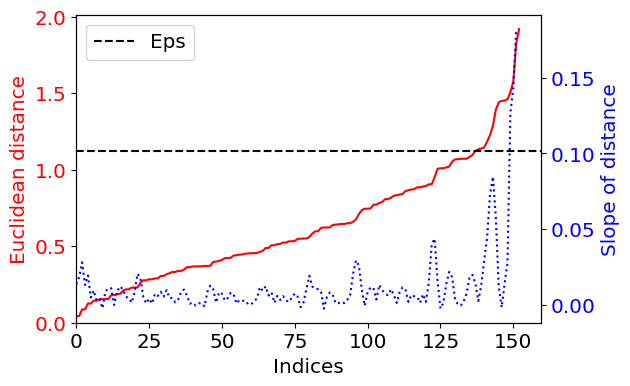

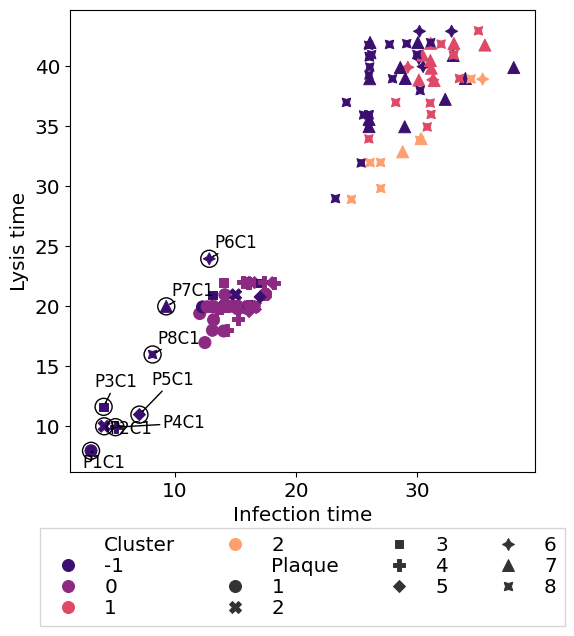

Cluster
 0    69
-1    55
 1    20
 2     9
Name: count, dtype: int64


In [ ]:
file_name = 'experimental data - attributes.xlsx'
sheet_name = 'all plaques'
n_rows = 153
round_one_cells = [0, 20, 34, 49, 73, 86, 94, 117]
plaque_markers_dict = {1: '*',2: 'o',3: '<',4: 'D',5: 'X',6: 's',7: '^',8: 'p'}

# file_name = 'S1.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# round_one_cells = [0, 10, 20, 30] # similar toy data
# plaque_markers_dict = {1: '*',2: 'o',3: '<',4: 'D'}

# file_name = 'S2.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# round_one_cells = [0, 10, 20, 30] # similar toy data
# plaque_markers_dict = {1: '*',2: 'o',3: '<',4: 'D'}

# file_name = 'S3.xlsx'
# sheet_name = 'attributes'
# n_rows = 56
# round_one_cells = [0, 11, 24, 31, 37, 47] # dissimilar toy data
# plaque_markers_dict = {1: '*',2: 'o',3: '<',4: 'D',5: 'X',6: 's'}

attributes_df = pd.read_excel(file_name, sheet_name, nrows=n_rows)
attributes_df = attributes_df.drop(labels=['Unnamed: 0', 'Cell #', 'Plaque', 'Cell ID'], axis=1)
indices = ['GFP max', 'Infection time', 'Rise time', 'Lysis time', 'Infection duration', 'Rise rate', 'Area']
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
legend_annotations = 'A - Area\nB - Infection time\nC - GFP max\nD - Infection duration\nE - Lysis time\nF - Rise rate\nG - Rise time'
n_features = 7

scaled_data = StandardScaler().fit_transform(attributes_df)
#pd.DataFrame(scaled_data, columns=attributes_df.columns)

n_neighbors = 8
eps = 1.125
neighbors = NearestNeighbors(n_neighbors=n_neighbors)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig, ax1 = plt.subplots(figsize=(6, 4))
color = 'red'
ax1.set_xlabel('Indices')
ax1.set_ylabel('Euclidean distance', color=color)
ax1.plot(distances, ls='-', color=color)
smoothed_distances = savgol_filter(distances, window_length=5, polyorder=2)
# ax1.plot(smoothed_distances, ls='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=eps, color='black', ls='--', label='Eps')
# ax1.axvline(x=np.argmax(np.diff(smoothed_distances)[130:148]) + 130, color='black', ls='--', label='Eps')

ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)
ax1.legend()
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Slope of distance', color=color)
ax2.plot(np.diff(smoothed_distances), ':', color=color)
ax2.tick_params(axis='y', labelcolor=color)
# plt.grid()
plt.show()

clustering = DBSCAN(eps=eps, min_samples=n_neighbors).fit(scaled_data)

DBSCAN_df = pd.read_excel(file_name, sheet_name, nrows=n_rows)
DBSCAN_df = DBSCAN_df.drop(labels=['Unnamed: 0'], axis=1)
DBSCAN_df['Cluster'] = clustering.labels_
DBSCAN_df['Plaque marker'] = DBSCAN_df['Plaque'].map(plaque_markers_dict)

plot_dbscan(DBSCAN_df, x_axis='Infection time', y_axis='Lysis time')
print(DBSCAN_df['Cluster'].value_counts())